# La prédiction avec les réseaux de neurones

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 1. Importation des données

In [125]:
df_train = pd.read_csv('train_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

In [3]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_tot_min
0,3,0,5,0.0,8,3897.0,24,3,1,10,22,20,170
1,1,3,0,2.0,8,7662.0,1,5,13,15,5,50,445


In [6]:
df_train['Destination'].unique()

array([5, 0, 1, 4, 2, 3], dtype=int64)

## 2. Encodons la variable Airline

On constate qu'il a jusqu'a 11 valeurs uniques

In [126]:
hot_df_train = pd.get_dummies(df_train, columns = ['Airline','Destination'])

In [8]:
hot_df_train.head(2)

,Source,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_8,Airline_9,Airline_10,Airline_11,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0,0.0,8,3897.0,24,3,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,3,2.0,8,7662.0,1,5,13,15,5,50,...,0,0,0,0,1,0,0,0,0,0


In [127]:
# Prétraitement des données
X = hot_df_train.drop(['Price'], axis=1)
y = hot_df_train['Price']

In [128]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Normalisation des train et test
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_train.mean()) / X_train.std()

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [38]:
X_train_norm = X_train_norm.drop('Airline_11', axis=1)
X_test_norm = X_test_norm.drop('Airline_11', axis = 1)

In [130]:
X_train_norm.shape, X_test.shape

((8544, 28), (2137, 28))

## 3. Création du modèle de réseau de neurones

In [131]:
#lenght = len(X_train_norm.columns)
model = Sequential()
model.add(Dense(128, kernel_initializer= 'uniform', activation='relu', input_dim = 28))
model.add(Dense(64,kernel_initializer= 'uniform', activation='relu'))
model.add(Dense(32, kernel_initializer= 'uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,kernel_initializer= 'uniform'))

model.compile(optimizer= 'adam', loss='mean_squared_error')

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               3712      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,081
Trainable params: 14,081
Non-trainable params: 0
_________________________________________________________________


In [133]:
history = model.fit(X_train_norm, y_train, epochs=500, validation_data=(X_test_norm, y_test))

Epoch 1/500
267/267 [==============================] - 1s 3ms/step - loss: 14953994.0000 - val_loss: 9636132.0000
Epoch 2/500
267/267 [==============================] - 1s 2ms/step - loss: 12285653.0000 - val_loss: 8685806.0000
Epoch 3/500
267/267 [==============================] - 1s 2ms/step - loss: 11775930.0000 - val_loss: 8081566.0000
Epoch 4/500
267/267 [==============================] - 1s 2ms/step - loss: 11127526.0000 - val_loss: 7590539.0000
Epoch 5/500
267/267 [==============================] - 1s 2ms/step - loss: 11019430.0000 - val_loss: 7131073.0000
Epoch 6/500
267/267 [==============================] - 1s 3ms/step - loss: 10320180.0000 - val_loss: 7008429.0000
Epoch 7/500
267/267 [==============================] - 1s 3ms/step - loss: 10233891.0000 - val_loss: 7116664.0000
Epoch 8/500
267/267 [==============================] - 1s 2ms/step - loss: 10003043.0000 - val_loss: 6510281.0000
Epoch 9/500
267/267 [==============================] - 1s 2ms/step - loss: 9914844.0000 

#### **Représentation graphique**

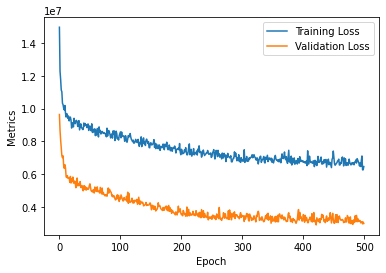

In [134]:
# Affichage de l'évolution de la perte et de la précision
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.show()

## 4. Prediction et evaluation du modèle

In [135]:
# Prédiction des prix des vols
y_pred = model.predict(X_test_norm)

# Évaluation du modèle
mse = model.evaluate(X_test_norm, y_test)
print('MSE:', mse)

67/67 [==============================] - 0s 3ms/step - loss: 2992436.5000
MSE: 2992436.5


##### Obsevation:
J'ai remarqué qu'au fur et à mesure que j'augmente l'epoch la precision du modèle augmente en diminuant le mse.

In [139]:
test_data = pd.DataFrame({"Prix réel": y_test, "Prix prédict": np.round(y_pred, 1).flatten()})
test_data

,Prix réel,Prix prédict
4830,10413.0,9860.299805
3771,4030.0,4488.799805
1523,5963.0,6556.899902
3393,6860.0,9528.400391
4169,14571.0,13432.200195
...,...,...
9869,4622.0,4352.899902
10061,7452.0,5924.799805
6911,6121.0,5206.399902
8616,13731.0,13012.599609


In [140]:
test_data[test_data['Prix réel'] == test_data['Prix prédict']]

,Prix réel,Prix prédict
